In [1]:
!pip install -q tensorflow scikit-learn seaborn

[INFO] Current working directory: /content
[INFO] Input feature size: 8373
[INFO] X shape after expand: (1000, 8373, 1)
[INFO] y shape: (1000,)
[INFO] Train size: 800
[INFO] Test size: 200


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 8371, 64)       │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 4185, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 4183, 128)      │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 2091, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 267648)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    34,259,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,284,161 (130.78 MB)

 Trainable params: 34,284,161 (130.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7650 - loss: 0.8281 - val_accuracy: 0.9688 - val_loss: 0.1661
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9813 - loss: 0.0968 - val_accuracy: 0.9312 - val_loss: 0.2629
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9863 - loss: 0.0410 - val_accuracy: 0.9750 - val_loss: 0.3360
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9997 - loss: 0.0057 - val_accuracy: 0.9750 - val_loss: 0.4576
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9972 - loss: 0.0104 - val_accuracy: 0.9812 - val_loss: 0.5482
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 0.9750 - val_loss: 0.6184
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.9989 - loss: 0.0026 - val_accuracy: 0.9625 - val_loss: 0.6804
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.9750 - val_loss:

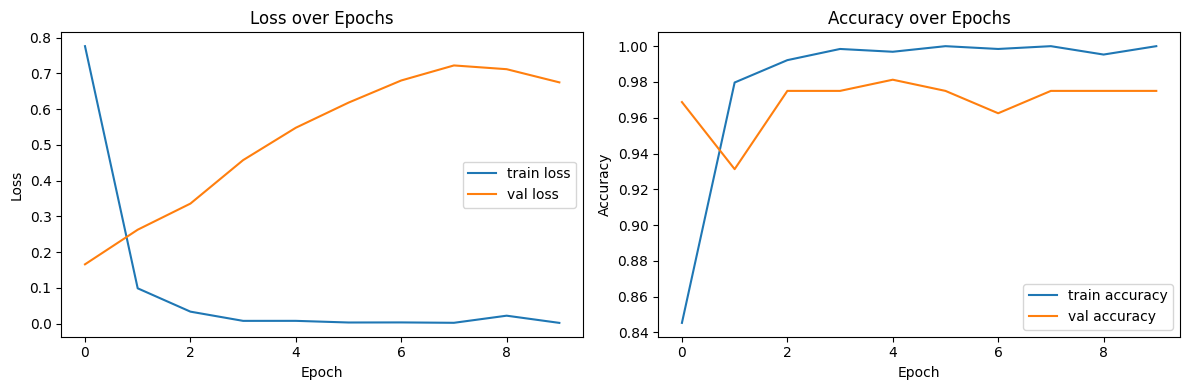

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 220ms/step


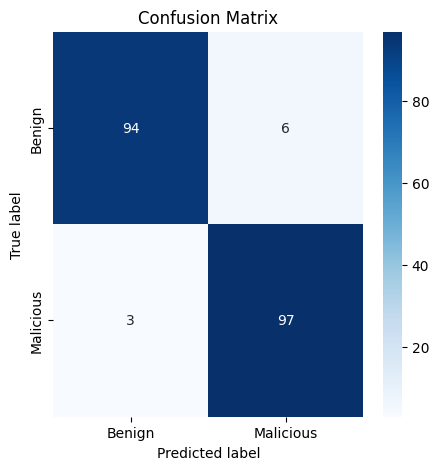

              precision    recall  f1-score   support

      Benign     0.9691    0.9400    0.9543       100
   Malicious     0.9417    0.9700    0.9557       100

    accuracy                         0.9550       200
   macro avg     0.9554    0.9550    0.9550       200
weighted avg     0.9554    0.9550    0.9550       200

[INFO] Saved model.


In [2]:
import os
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras import models, layers

import matplotlib.pyplot as plt
import seaborn as sns


# ---------- 1. CNN model ----------

def build_cnn(input_size: int) -> models.Model:
    """
    Simple 1D CNN for binary classification over feature vectors.
    """
    model = models.Sequential(
        [
            layers.Input(shape=(input_size, 1)),
            layers.Conv1D(64, 3, activation="relu"),
            layers.MaxPooling1D(2),
            layers.Conv1D(128, 3, activation="relu"),
            layers.MaxPooling1D(2),
            layers.Flatten(),
            layers.Dense(128, activation="relu"),
            layers.Dropout(0.4),
            layers.Dense(1, activation="sigmoid"),  # Binary output
        ]
    )
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model


# ---------- 2. Training visualization ----------

def plot_training_curves(history):
    """Plot training / validation loss and accuracy curves"""
    plt.figure(figsize=(12, 4))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"], label="train loss")
    if "val_loss" in history.history:
        plt.plot(history.history["val_loss"], label="val loss")
    plt.title("Loss over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # Accuracy
    plt.subplot(1, 2, 2)
    if "accuracy" in history.history:
        plt.plot(history.history["accuracy"], label="train accuracy")
    if "val_accuracy" in history.history:
        plt.plot(history.history["val_accuracy"], label="val accuracy")
    plt.title("Accuracy over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()


def plot_confusion_and_report(model, X_test, y_test, threshold=0.5, label_names=None):
    """
    Plot confusion matrix & print classification report for binary classification.

    - model: trained Keras model with sigmoid output
    - X_test: test feature set (N, F, 1)
    - y_test: test labels (0 / 1)
    """
    # 1. Predict probabilities
    y_prob = model.predict(X_test).ravel()

    # 2. Convert probabilities to binary predictions
    y_pred = (y_prob > threshold).astype(int)

    # 3. Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=label_names if label_names is not None else ["Class 0", "Class 1"],
        yticklabels=label_names if label_names is not None else ["Class 0", "Class 1"],
    )
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title("Confusion Matrix")
    plt.show()

    # 4. Classification report
    print(
        classification_report(
            y_test,
            y_pred,
            target_names=label_names,
            digits=4
        )
    )


# ---------- 3. Main pipeline: load .npy -> train -> visualize -> save ----------

REPO_ROOT = os.getcwd()
print("[INFO] Current working directory:", REPO_ROOT)

# 1) Load vectors and labels (generated by vectorizeFeatures.py)
X = np.load(os.path.join(REPO_ROOT, "X_vectors.npy"))
y = np.load(os.path.join(REPO_ROOT, "y_labels.npy"))

X = X.astype("float32")

# Directly obtain the feature dimensions from X: X.shape = (number of samples, number of features)
input_size = X.shape[1]
print("[INFO] Input feature size:", input_size)

# 2) Expand dimensions for 1D CNN: (N, F) -> (N, F, 1)
X = np.expand_dims(X, -1)

print("[INFO] X shape after expand:", X.shape)
print("[INFO] y shape:", y.shape)

# 3) Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42,
)

print("[INFO] Train size:", X_train.shape[0])
print("[INFO] Test size:", X_test.shape[0])

# 4) Build & train model
model = build_cnn(input_size=input_size)
model.summary()

history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    shuffle=True,
)

# 5) Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"[RESULT] Test Accuracy: {test_acc:.4f}")

# 6) Visualization: training curves
plot_training_curves(history)

# 7) Visualization: confusion matrix + classification report
plot_confusion_and_report(
    model,
    X_test,
    y_test,
    threshold=0.5,
    label_names=["Benign", "Malicious"],
)

# 8) Save model
model.save(os.path.join(REPO_ROOT, "apk_malware_cnn_model.keras"))
print("[INFO] Saved model.")


In [ ]:
from google.colab import files
files.download("apk_malware_cnn_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>